In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
# Load data
housing = datasets.fetch_california_housing(as_frame=True)
df = housing.frame

In [4]:
# Z-score function
def z_score(array):
    mean = np.mean(array)
    sigma = np.std(array, ddof=1)
    return (array - mean) / sigma

In [5]:
# Add z-score columns
df['ab_z'] = z_score(df['AveBedrms'].values)
df['ao_z'] = z_score(df['AveOccup'].values)

In [6]:
# AverBedrms(ab) parametrs
ab_list = df['AveBedrms'].values.tolist()
ab_array = df['AveBedrms'].values
ab_frame = df['AveBedrms']

# AveOccup(ao) parameters
ao_list = df['AveOccup'].values.tolist()
ao_array = df['AveOccup'].values
ao_frame = df['AveOccup']

In [7]:
# Covariance calculation using z-scored data:
def calculate_covariance(X1, X2):
    if len(X1) != len(X2):
        raise ValueError("Lists X1 and X2 must have the same length")
    n = len(X1)
    mean_X1 = np.mean(X1)
    mean_X2 = np.mean(X2)
    covariance = np.sum((X1 - mean_X1) * (X2 - mean_X2)) / n
    return covariance

calculate_covariance(ab_list, ao_list)

np.float64(-0.030422779652071935)

In [8]:
# Correlation calculation using z-scored data
def calculate_correlation(X1, X2):
    if len(X1) != len(X2):
        raise ValueError("Lists must have the same length")
    n = len(X1)
    mean_X1 = np.mean(X1)
    mean_X2 = np.mean(X2)
    cov = np.sum((X1 - mean_X1) * (X2 - mean_X2)) / n
    std_X1 = np.sqrt(np.sum((X1 - mean_X1) ** 2) / n)
    std_X2 = np.sqrt(np.sum((X2 - mean_X2) ** 2) / n)

# calculate the correlation coeffecient
    if std_X1 == 0 or std_X2 == 0:
        raise ValueError("Standard deviation cannot be zero for correlation calculation")
    corr = cov / (std_X1 * std_X2)
    return corr

calculate_correlation(ab_list, ao_list)

np.float64(-0.00618120126867311)

In [9]:
# dataframe corelation
df[['AveBedrms' , 'AveOccup']].corr()

,AveBedrms,AveOccup
AveBedrms,1.000000,-0.006181
AveOccup,-0.006181,1.000000


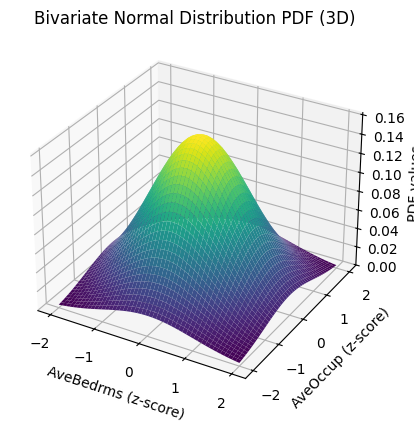

In [17]:
# Bivariate normal distribution


def calculate_BND_vectorized(X1,X2):
  # calculate parameters from z-score datasets
  mu1 = np.mean(df['ab_z'])
  mu2 = np.mean(df['ao_z'])
  sigma1 = np.std(df['ab_z'], ddof=1)
  sigma2 = np.std(df['ao_z'], ddof=1)
  corr = np.corrcoef(df['ab_z'], df['ao_z'])[0,1]

  coeff = 1 / (2 * np.pi * sigma1 * sigma2 * np.sqrt(1-(corr ** 2)))

  z1 = (X1 - mu1)/ sigma1
  z2 = (X2 - mu2) / sigma2

  zfun = ((z1 ** 2) - (2 * corr * z1 * z2) + (z2 ** 2)) / (1 - (corr ** 2))

  exponent = np.exp(-0.5 * zfun)

  return coeff * exponent



# Mashgrid
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)

X, Y = np.meshgrid(x, y)

# Z- function of BND
Z = calculate_BND_vectorized(X, Y)



fig_3d = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap = 'viridis')
ax.set_xlabel('AveBedrms (z-score)')
ax.set_ylabel('AveOccup (z-score)')
ax.set_zlabel('PDF values')
ax.set_title('Bivariate Normal Distribution PDF (3D)')

plt.show()